### Algo Trading


In [1]:
# Imports
import pandas as pd
from pathlib import Path

### Read the CSV file into Pandas DataFrame


In [2]:
# Import the OHLCV dataset into a Pandas Dataframe
trading_df = pd.read_csv(
    Path("Resources/NASDQ 100 Tickers (7.25)/AAPL.csv"), 
    index_col="Date", 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
trading_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-27,93.709999,94.904999,93.480003,94.809998,93.640457,121214000
2020-07-28,94.367500,94.550003,93.247498,93.252502,92.102150,103625600
2020-07-29,93.750000,95.230003,93.712502,95.040001,93.867607,90329200
2020-07-30,94.187500,96.297501,93.767502,96.190002,95.003426,158130000
2020-07-31,102.885002,106.415001,100.824997,106.260002,104.949219,374336800


### Add a daily return values column to the DataFrame

In [3]:
# Calculate the daily returns using the closing prices and the pct_change function
trading_df["actual_returns"] = trading_df["Close"].pct_change()

# Drop all NaN values from the DataFrame
trading_df = trading_df.dropna()

# Review the DataFrame
display(trading_df.head())
display(trading_df.tail())

,Open,High,Low,Close,Adj Close,Volume,actual_returns
Date,,,,,,,
2020-07-28,94.367500,94.550003,93.247498,93.252502,92.102150,103625600,-0.016428
2020-07-29,93.750000,95.230003,93.712502,95.040001,93.867607,90329200,0.019168
2020-07-30,94.187500,96.297501,93.767502,96.190002,95.003426,158130000,0.012100
2020-07-31,102.885002,106.415001,100.824997,106.260002,104.949219,374336800,0.104689
2020-08-03,108.199997,111.637497,107.892502,108.937500,107.593681,308151200,0.025198


,Open,High,Low,Close,Adj Close,Volume,actual_returns
Date,,,,,,,
2022-07-18,150.740005,151.570007,146.699997,147.070007,147.070007,81420900,-0.020643
2022-07-19,147.919998,151.229996,146.910004,151.000000,151.000000,82982400,0.026722
2022-07-20,151.119995,153.720001,150.369995,153.039993,153.039993,64823400,0.013510
2022-07-21,154.500000,155.570007,151.940002,155.350006,155.350006,65086600,0.015094
2022-07-22,155.389999,156.279999,153.410004,154.089996,154.089996,66625400,-0.008111


### Generating the Features and Target Sets

In [4]:
# Define a window size of 4
short_window = 10

# Create a simple moving average (SMA) using the short_window and assign this to a new columns called sma_fast
trading_df["sma_fast"] = trading_df["Close"].rolling(window=short_window).mean()

In [5]:
# Define a window size of 100
long_window = 100

# Create a simple moving average (SMA) using the long_window and assign this to a new columns called sma_slow
trading_df["sma_slow"] = trading_df["Close"].rolling(window=long_window).mean()

In [6]:
# Drop the NaNs using dropna()
trading_df = trading_df.dropna()

#### Create the features set

In [7]:
# Assign a copy of the sma_fast and sma_slow columns to a new DataFrame called X
X = trading_df[["sma_fast", "sma_slow"]].copy()

# Display sample data
display(X.head())
display(X.tail())

,sma_fast,sma_slow
Date,,
2020-12-16,123.821999,116.532975
2020-12-17,124.397999,116.887450
2020-12-18,124.838999,117.203650
2020-12-21,125.286999,117.524050
2020-12-22,126.037000,117.780250


,sma_fast,sma_slow
Date,,
2022-07-18,145.980,154.428801
2022-07-19,146.924,154.338100
2022-07-20,147.936,154.241100
2022-07-21,148.836,154.146100
2022-07-22,149.541,154.035800


#### Create the target set

In [8]:
# Create a new column in the trading_df called signal setting its value to zero.
trading_df["signal"] = 0.0

In [9]:
# Create the signal to buy
trading_df.loc[(trading_df["actual_returns"] >= 0), "signal"] = 1

In [10]:
# Create the signal to sell
trading_df.loc[(trading_df["actual_returns"] < 0), "signal"] = -1

In [11]:
# Copy the new signal column to a new Series called y.
y = trading_df["signal"].copy()


### Split the Data Into Training and Testing Datasets

#### Creating the Training Datasets

In [12]:
# Imports 
from pandas.tseries.offsets import DateOffset

In [13]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2020-12-16 00:00:00


In [14]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=1)

# Display the training end date
print(training_end)

2021-01-16 00:00:00


In [15]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data
X_train.head()

,sma_fast,sma_slow
Date,,
2020-12-16,123.821999,116.532975
2020-12-17,124.397999,116.887450
2020-12-18,124.838999,117.203650
2020-12-21,125.286999,117.524050
2020-12-22,126.037000,117.780250


#### Creating the Testing Datasets

In [16]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data
X_test.head()

,sma_fast,sma_slow
Date,,
2021-01-19,129.313000,120.435500
2021-01-20,129.415000,120.490575
2021-01-21,130.442000,120.609175
2021-01-22,131.257001,120.751800
2021-01-25,132.344000,120.890600


#### Standardizing the Data

In [17]:
# Imports
from sklearn.preprocessing import StandardScaler

In [18]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



### Incorporate the SVM Machine Learning Into the Trading Strategy

In [19]:
# Imports
from sklearn import svm
from sklearn.metrics import classification_report


# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([-1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.])

In [20]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.67      0.83      0.74        12
         1.0       0.67      0.44      0.53         9

    accuracy                           0.67        21
   macro avg       0.67      0.64      0.64        21
weighted avg       0.67      0.67      0.65        21



### Backtesting a Machine Learning Trading Algorithm

In [21]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [22]:
# Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.48      1.00      0.64       181
         1.0       0.00      0.00      0.00       200

    accuracy                           0.48       381
   macro avg       0.24      0.50      0.32       381
weighted avg       0.23      0.48      0.31       381



C:\Users\John\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = testing_signal_predictions
predictions_df["actual_returns"] = trading_df["actual_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["predicted_signal"]
predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2021-01-19,-1.0,0.005427,-0.005427
2021-01-20,-1.0,0.032856,-0.032856
2021-01-21,-1.0,0.036658,-0.036658
2021-01-22,-1.0,0.016074,-0.016074
2021-01-25,-1.0,0.027684,-0.027684



Bad key savefig.frameon in file C:\Users\John\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\John\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\John\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an 

<AxesSubplot:xlabel='Date'>

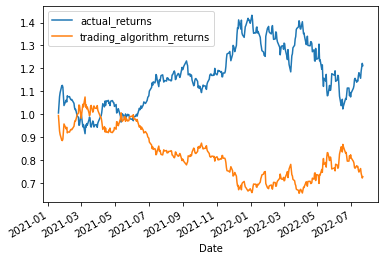

In [24]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()